In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from e_com import get_names
import calendar
import folium
from branca.element import Figure
from branca.colormap import LinearColormap
import json

In [2]:
df = pd.read_csv('Sample-Superstore.csv', encoding='ISO-8859-1')

In [3]:
df.shape

(9994, 21)

In [4]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [7]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [9]:
df.nunique()

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64

In [10]:
def nunique_check(data, group, feature):
    f_count = data.groupby(group)[feature].nunique()
    print(
        f"Number of {group} that have > 1 unique {feature}: {f_count[f_count > 1].count()}"
    )

In [11]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

In [12]:
df['Cost'] = round((df['Sales'] - df['Profit'])/df['Quantity'], 4)
df['Sell Price'] = round(df['Sales']/((1 - df['Discount'])*df['Quantity']), 4)
df['Net Profit Margin'] = df['Profit']/df['Sales']
df['ROI'] = df['Profit']/(df['Cost']*df['Quantity'])
df['year'] = df['Order Date'].dt.year
df['quarter'] = df['Order Date'].dt.quarter
df['month'] = df['Order Date'].dt.month
df['weekday'] = df['Order Date'].dt.strftime('%A')
df['Delivery Time'] = (df['Ship Date'] - df['Order Date']).dt.days


In [13]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
years = np.arange(2014, 2018)
categories_order = df['Category'].unique()
subcategories_order = []

for cat in categories_order:
    sc = df[df['Category'] == cat ]['Sub-Category'].unique()
    subcategories_order.extend(sc)

In [14]:
df['Category'] = pd.Categorical(df['Category'], categories=categories_order)
df['Sub-Category'] = pd.Categorical(df['Sub-Category'], categories=subcategories_order)
df['month'] = pd.Categorical(df['month'], categories=df['month'].unique().sort())
df['weekday'] = pd.Categorical(df['weekday'], categories=weekdays, ordered=True)
df['year'] = pd.Categorical(df['year'], categories=years, ordered=True)

In [15]:
nunique_check(df, 'Order ID', 'Ship Date')
nunique_check(df, ['Order ID', 'Product ID'], 'Sales')
nunique_check(df, 'Order ID', 'Discount')
nunique_check(df, 'Product ID', 'Product Name')
# Some products vary in price
nunique_check(df, 'Product ID', 'Cost')
nunique_check(df, 'Product Name', 'Product ID')
nunique_check(df, 'Product Name', 'Cost')
# One address can have multiple addresses
nunique_check(df, 'Postal Code', 'Customer ID')
# One customer can have multiple addresses
nunique_check(df, 'Customer ID', 'Postal Code')
nunique_check(df, 'Customer ID', 'Customer Name')

Number of Order ID that have > 1 unique Ship Date: 0
Number of ['Order ID', 'Product ID'] that have > 1 unique Sales: 7
Number of Order ID that have > 1 unique Discount: 1211
Number of Product ID that have > 1 unique Product Name: 32
Number of Product ID that have > 1 unique Cost: 32
Number of Product Name that have > 1 unique Product ID: 16
Number of Product Name that have > 1 unique Cost: 13
Number of Postal Code that have > 1 unique Customer ID: 488
Number of Customer ID that have > 1 unique Postal Code: 780
Number of Customer ID that have > 1 unique Customer Name: 0


In [17]:
state_orders = df.groupby('State')['Order ID'].count()
state_sales = df.groupby('State')['Sales'].sum()
state_discount = df.groupby('State')['Discount'].mean()
state_profit = df.groupby('State')['Profit'].sum()
state_customers = df.groupby('State')['Customer ID'].nunique()

In [18]:
product_sales = df.groupby('Product ID')['Sales'].sum()
product_profit = df.groupby('Product ID')['Profit'].sum()
product_orders = df.groupby('Product ID')['Order ID'].count()
products_sold = df.groupby('Product ID')['Quantity'].sum()
product_del_time = df.groupby('Product ID')['Delivery Time'].mean() 

In [19]:
customer_orders = df.groupby("Customer ID")["Order ID"].count()
customer_sales = df.groupby("Customer ID")["Sales"].sum()
customer_order_quantity = (
    df.groupby(["Customer ID", "Order ID"], as_index=False)["Quantity"]
    .sum()
    .groupby("Customer ID", as_index=False)["Quantity"]
    .mean()
)
customer_avg_order = (
    df.groupby(["Customer ID", "Order ID"], as_index=False)["Sales"]
    .sum()
    .groupby("Customer ID", as_index=False)["Sales"]
    .mean()
)
customer_avg_order.rename(columns={"Sales": "Average Order Value"}, inplace=True)

In [20]:
n_orders_customers = (
    df.groupby("year")
    .agg({"Order ID": "nunique", "Customer ID": "nunique"})
    .reset_index()
)
n_orders_customers["Purchase Frequency"] = (
    n_orders_customers["Order ID"] / n_orders_customers["Customer ID"]
)
customer_first_order = (
    df[["Customer ID", "Order Date"]]
    .sort_values("Order Date")
    .drop_duplicates(subset="Customer ID")
)

In [21]:
average_order_value = (
    df["Sales"].sum() / df.drop_duplicates("Order ID")["Order ID"].count()
)

In [22]:
def get_sales_dates(year):
    # Create a calendar for November of the specified year
    cal = calendar.monthcalendar(year, 11)  # November is month 11
    # Calculate the date of the fourth Thursday (Thanksgiving)
    thanksgiving = cal[3][calendar.THURSDAY]
    cybermonday = cal[4][calendar.MONDAY]
    print(f"{year} November Sales dates are from {thanksgiving} to {cybermonday}")

In [23]:
def top_bar_plot(data, top, ax, title, bottom = False):
    if bottom:
        x, y = data.nlargest(top).values, data.nlargest(top).index
    else:
        x, y = data.nsmallest(top).values, data.nsmallest(top).index
    sns.barplot(y=y, x=x, color=color[2], ax=ax)
    ax.set_title(f'Top {top} {title}')
    ax.set_ylabel('')

In [24]:
text_color = '#ffff00'
face_color = '#222A3588'

sns.set_theme()
sns.set_style('darkgrid')
sns.set(rc={
    'axes.labelsize': 15,
    'axes.titlesize': 15,
    'axes.titlepad': 10,
    'xtick.labelsize': 10,
    'xtick.color': text_color,
    'ytick.labelsize': 10,
    'ytick.color': text_color,
    'axes.labelcolor': text_color,
    'axes.titlecolor': text_color,
    "figure.dpi":100, 
    'savefig.dpi':200,
    'figure.facecolor': face_color,
    'grid.color': text_color,
    'grid.alpha': 0.3,
    'grid.linewidth': 0.5,
    'axes.facecolor': face_color,
    "axes.linewidth": 0.5,
    'axes.edgecolor': text_color,
    'patch.linewidth': 0.5,
    'patch.edgecolor': text_color,
    'legend.labelcolor': text_color,
    'legend.edgecolor': text_color,
    "text.color": text_color
    }) 

In [25]:
color = ['#ff9e03', '#00e853', '#4f35d4', '#ff0066', '#ffb300']

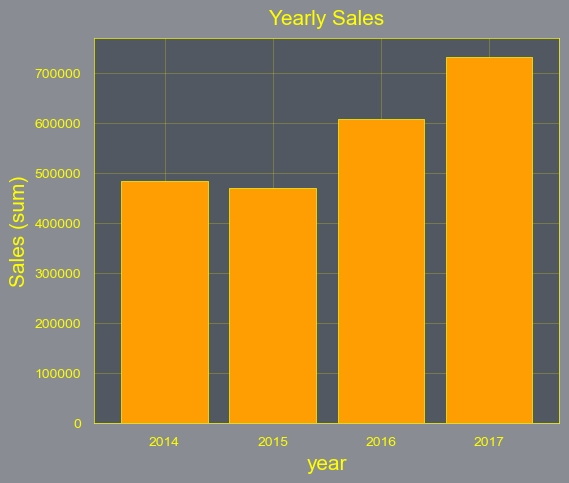

In [27]:
fig, ax = plt.subplots(figsize=(6, 5))

days = df.groupby(df["year"])
days["Sales"].sum().plot(kind="bar", width=0.8, color=color[0], x=weekdays)
ax.set_ylabel("Sales (sum)")
plt.title("Yearly Sales")
plt.xticks(rotation=0)
plt.show()

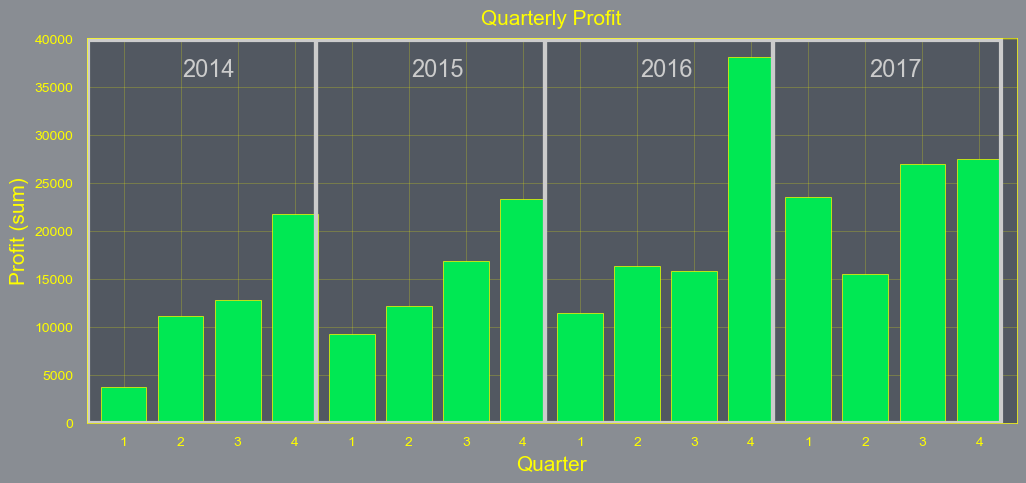

In [29]:
fig, ax = plt.subplots(figsize=(12, 5))

edgecolor = "#cccccc"
quarters = df.groupby(pd.Grouper(key="Order Date", freq="Q"))
quarters["Profit"].sum().plot(kind="bar", width=0.8, color=color[1])
xlabels = [q.quarter for q, g in quarters]
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(xlabels, rotation=0)
a, b = 4, 39800
for i in range(a):
    square = mpl.patches.Rectangle(
        (-0.62 + a * i, 20),
        a,
        b,
        linewidth=3,
        edgecolor=edgecolor,
        facecolor="#ffffff00",
    )
    ax.text(
        0.103 + i / 4.06,
        0.90,
        2014 + i,
        transform=ax.transAxes,
        fontsize=17,
        color=edgecolor,
    )
    ax.add_patch(square)
ax.set_ylabel("Profit (sum)")
ax.set_xlabel("Quarter")
plt.title("Quarterly Profit")
plt.show()

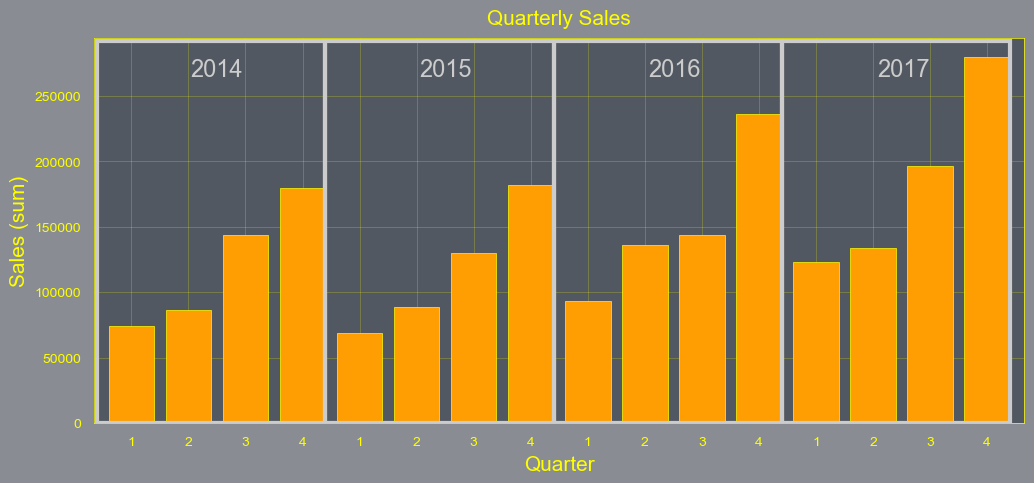

In [30]:
fig, ax = plt.subplots(figsize=(12, 5))

quarters = df.groupby(pd.Grouper(key="Order Date", freq="Q"))
quarters["Sales"].sum().plot(kind="bar", width=0.8, color=color[0])
xlabels = [q.quarter for q, g in quarters]
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(xlabels, rotation=0)
a, b = 4, 292000
for i in range(a):
    square = mpl.patches.Rectangle(
        (-0.6 + a * i, 100),
        a,
        b,
        linewidth=3,
        edgecolor=edgecolor,
        facecolor="#ffffff00",
    )
    ax.text(
        0.103 + i / 4.06,
        0.90,
        2014 + i,
        transform=ax.transAxes,
        fontsize=17,
        color=edgecolor,
    )
    ax.add_patch(square)
ax.set_ylabel("Sales (sum)")
ax.set_xlabel("Quarter")
plt.title("Quarterly Sales")
plt.show()

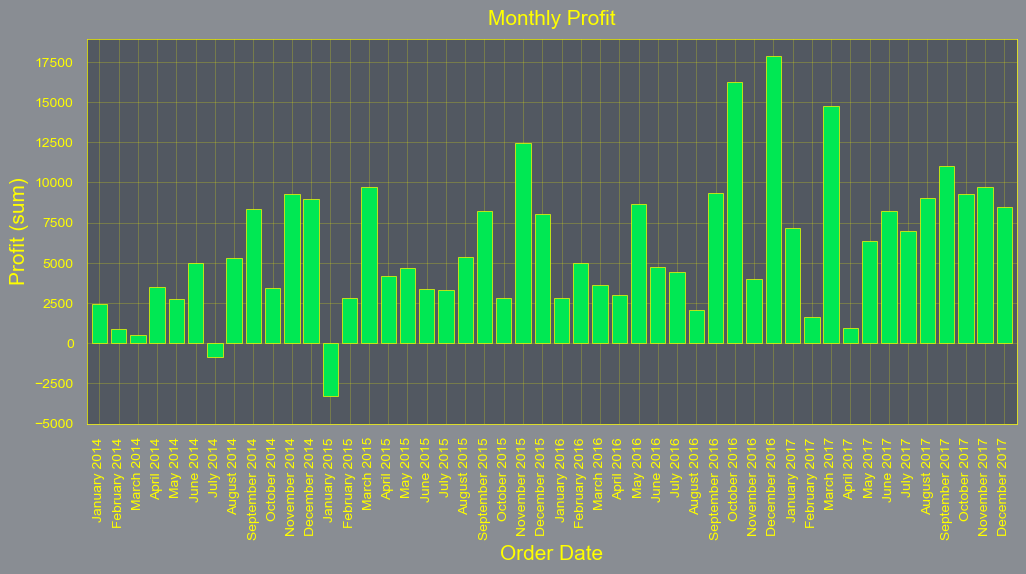

In [31]:
fig, ax = plt.subplots(figsize=(12, 5))

months = df.groupby(pd.Grouper(key="Order Date", freq='M'))
months['Profit'].sum().plot(kind='bar', width=0.8, color=color[1])
xlabels = [m.strftime('%B %Y') for m, g in months]
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(xlabels)
ax.set_yticks(np.arange(-5000, 20000, 2500))
plt.title('Monthly Profit')
ax.set_ylabel('Profit (sum)')
plt.show()

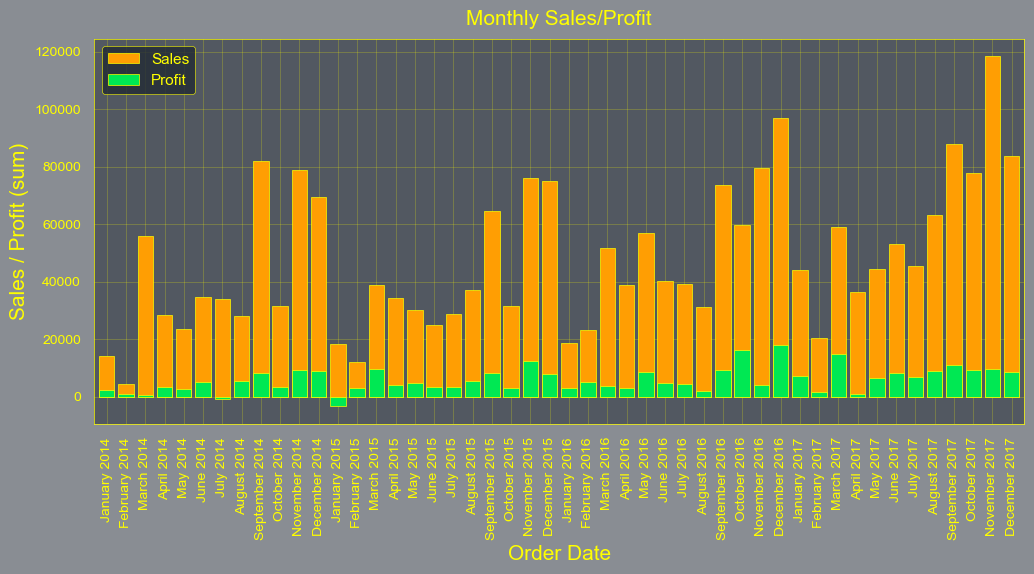

In [32]:
fig, ax = plt.subplots(figsize=(12, 5))

months = df.groupby(pd.Grouper(key="Order Date", freq='M'))
months['Sales'].sum().plot(kind='bar', width=0.8, color=color[0])
months['Profit'].sum().plot(kind='bar', width=0.8, color=color[1])
xlabels = [m.strftime('%B %Y') for m, g in months]
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(xlabels)
ax.set_ylabel('Sales / Profit (sum)')
plt.title('Monthly Sales/Profit')
plt.legend()
plt.show()

In [33]:
[get_sales_dates(year) for year in years]

2014 November Sales dates are from 20 to 24
2015 November Sales dates are from 19 to 23
2016 November Sales dates are from 24 to 28
2017 November Sales dates are from 23 to 27


[None, None, None, None]

In [36]:
df[df["Order Date"] == "2014-11-24"].groupby("Category", as_index=False)[
    "Discount"
].mean().sort_values("Discount", ascending=False)

,Category,Discount
2,Technology,0.266667
0,Furniture,0.140000
1,Office Supplies,0.118182


In [37]:
df[df["Order Date"] == "2014-11-24"].groupby("Category", as_index=False)[
    "Sales"
].sum().sort_values("Sales", ascending=False)

,Category,Sales
2,Technology,2664.136
1,Office Supplies,1884.662
0,Furniture,1029.808


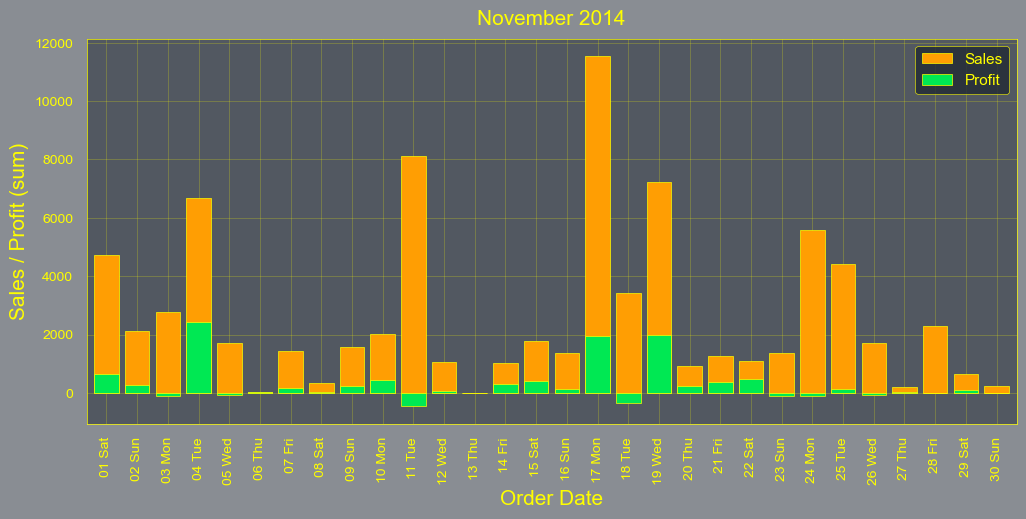

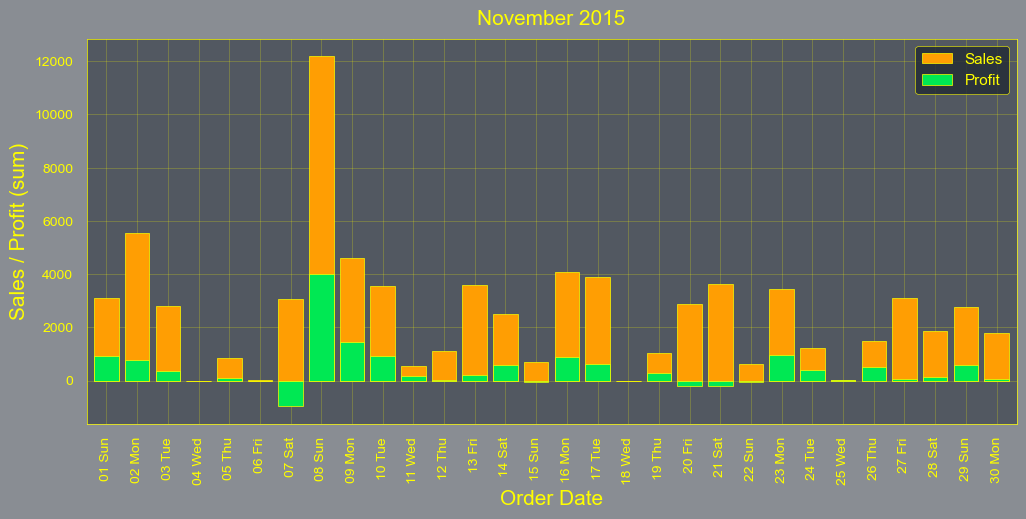

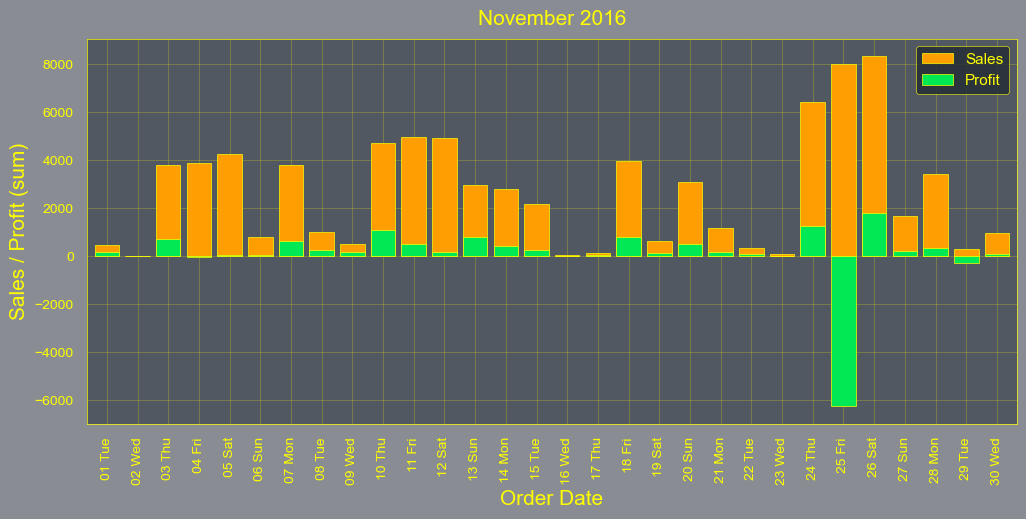

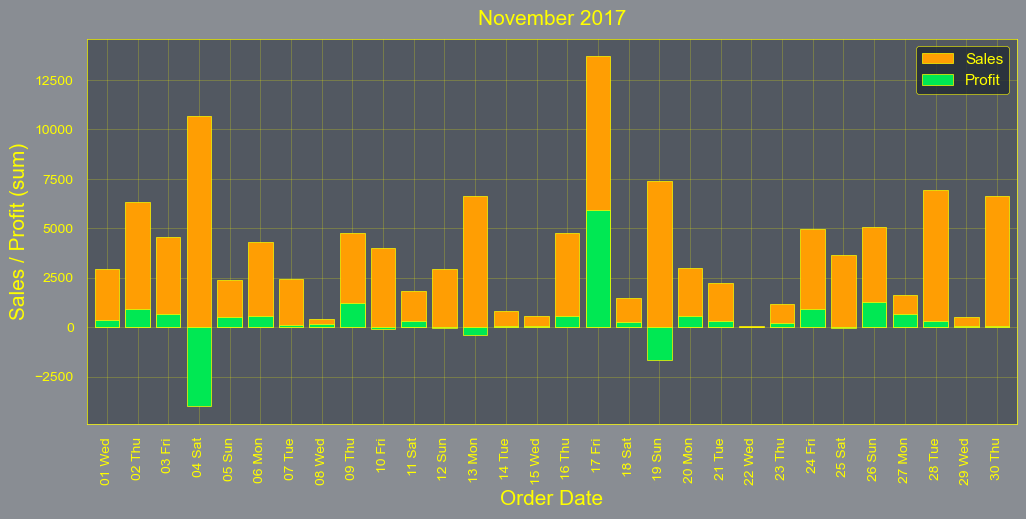

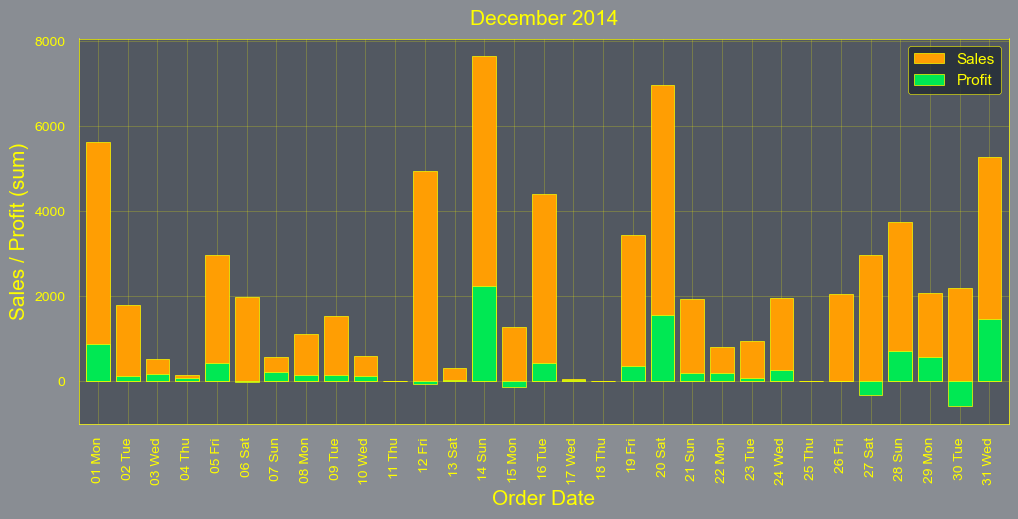

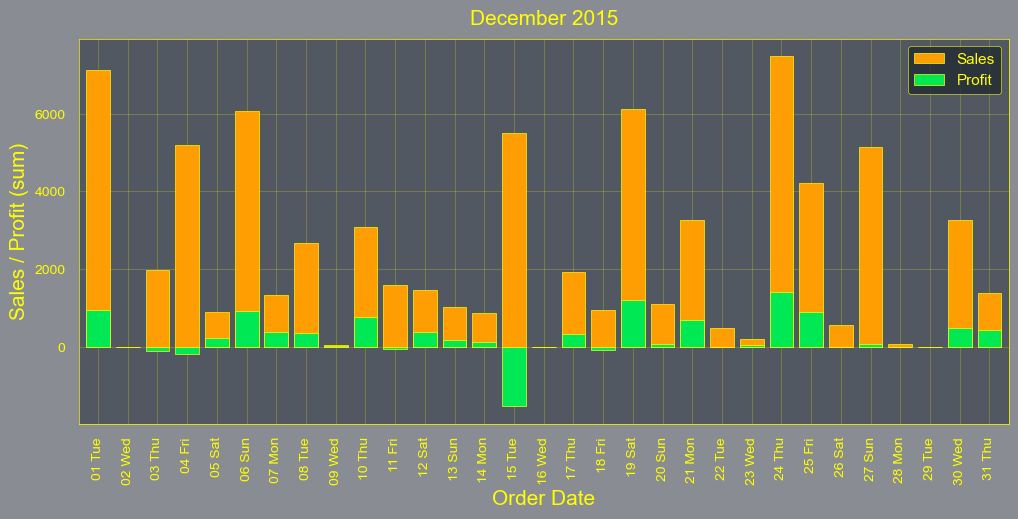

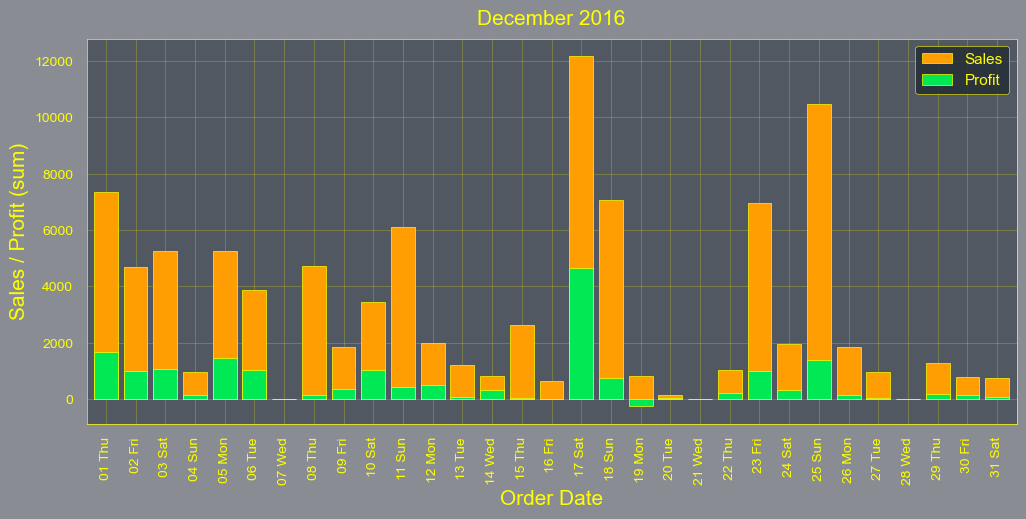

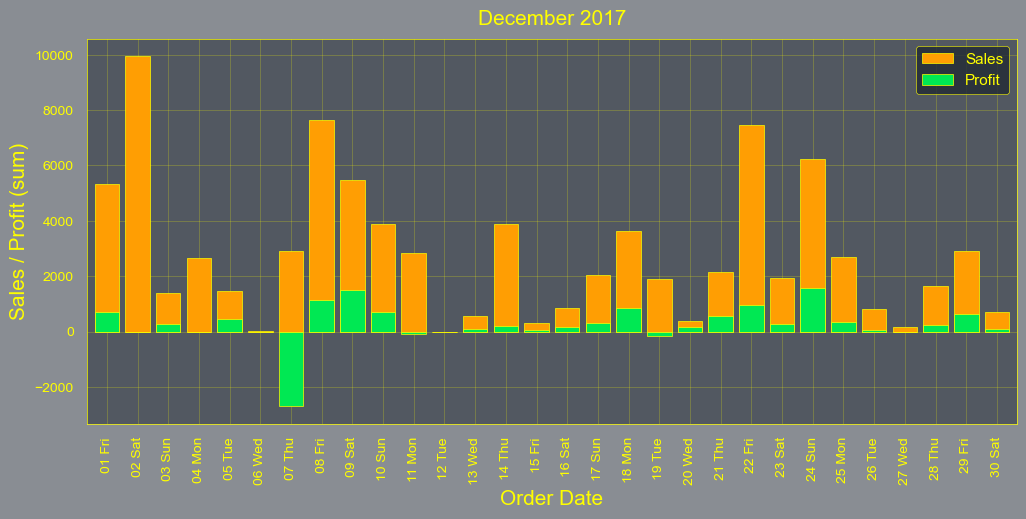

In [38]:
def month_days_sales_profit(data, month, year):
    fig, ax = plt.subplots(figsize=(12, 5))

    days = data[(data["month"] == month) & (data["year"] == year)].groupby(
        pd.Grouper(key="Order Date", freq="D")
    )
    days["Sales"].sum().plot(kind="bar", width=0.8, color=color[0])
    days["Profit"].sum().plot(kind="bar", width=0.8, color=color[1])
    xlabels = [d.strftime("%d %a") for d, g in days]
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(xlabels, rotation=90)
    ax.set_ylabel("Sales / Profit (sum)")
    plt.title(f"{calendar.month_name[month]} {year}")
    plt.legend()
    plt.show()


for month in [11, 12]:
    for year in years:
        month_days_sales_profit(df, month, year)

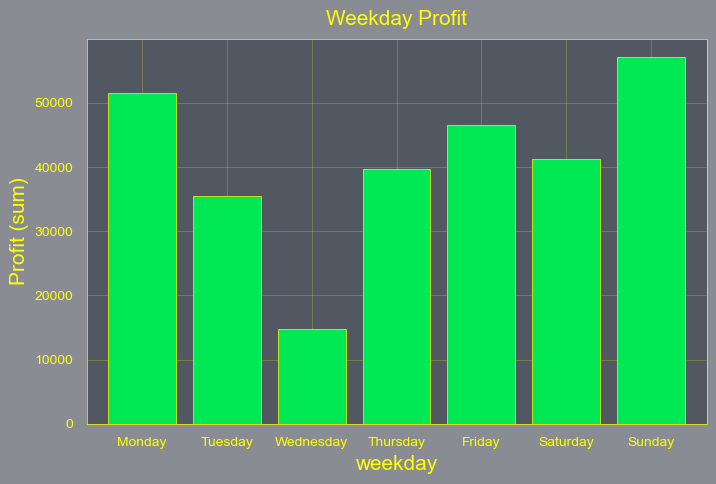

In [43]:
fig, ax = plt.subplots(figsize=(8, 5))

days = df.groupby(df['weekday'])
days['Profit'].sum().plot(kind='bar', width=0.8, color=color[1], x=weekdays)
ax.set_ylabel('Profit (sum)')
plt.title('Weekday Profit')
plt.xticks(rotation=0)
plt.show()

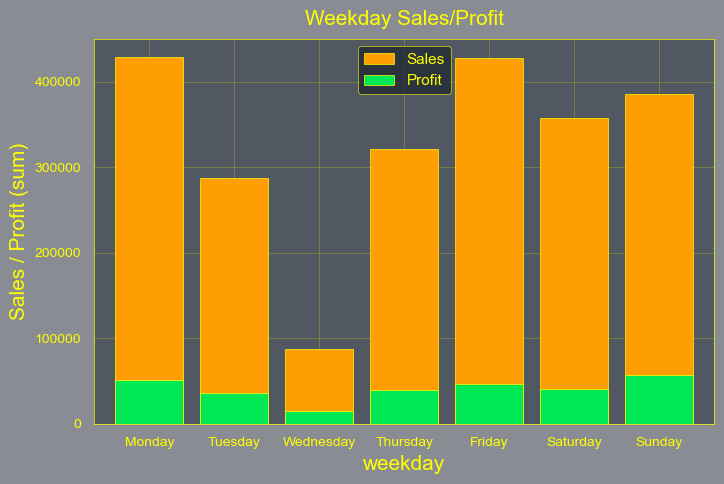

In [44]:
fig, ax = plt.subplots(figsize=(8, 5))

days = df.groupby(df['weekday'])
days['Sales'].sum().plot(kind='bar', width=0.8, color=color[0], x=weekdays)
days['Profit'].sum().plot(kind='bar', width=0.8, color=color[1], x=weekdays)
ax.set_ylabel('Sales / Profit (sum)')
plt.title('Weekday Sales/Profit')
plt.xticks(rotation=0)
plt.legend(loc='upper center')
plt.show()

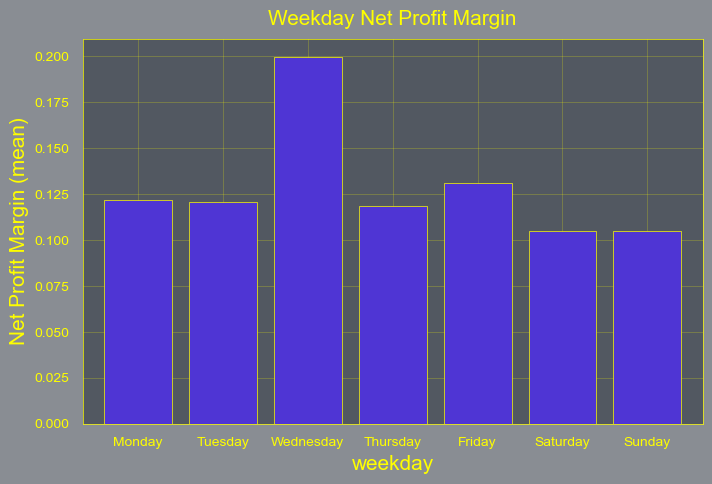

In [45]:
fig, ax = plt.subplots(figsize=(8, 5))

days = df.groupby(df["weekday"])
days["Net Profit Margin"].mean().plot(kind="bar", width=0.8, color=color[2], x=weekdays)
ax.set_ylabel("Net Profit Margin (mean)")
plt.title("Weekday Net Profit Margin")
plt.xticks(rotation=0)
plt.show()

In [46]:
subcat_roi = pd.DataFrame()

for key, item in df.groupby('Sub-Category'):
    l = len(subcat_roi)
    subcat_roi.loc[l, "Sub-Category"] = key
    subcat_roi.loc[l, "Category"] = item['Category'].values[0]
    subcat_roi.loc[l, "ROI"] = item['Profit'].sum()/(item['Cost']*item['Quantity']).sum()


In [47]:
palette = ["#ff9e03", "#4f35d4", "#00e853"]


def subcategories_plot(data, feature, estimator="mean", errorbar=("ci", 95)):
    fig, ax = plt.subplots(figsize=(10, 5))

    sns.barplot(
        data=data,
        x="Sub-Category",
        y=feature,
        estimator=estimator,
        errorbar=errorbar,
        hue="Category",
        width=0.96,
        dodge=0,
        palette=palette,
        saturation=1,
    )

    plt.title(f"Sub-Category {feature}")
    plt.ylabel(f"{feature} ({estimator})")
    plt.xticks(rotation=90)
    plt.show()

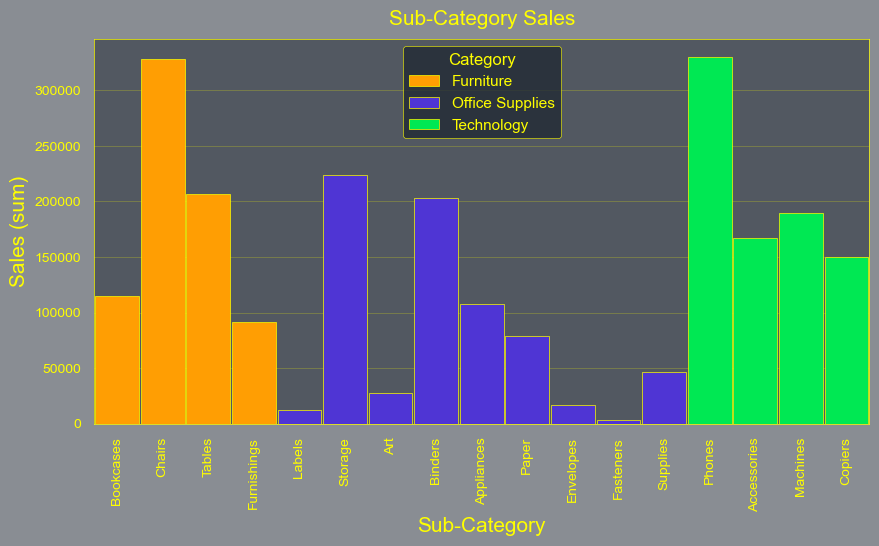

In [48]:
subcategories_plot(df, 'Sales', 'sum', None)

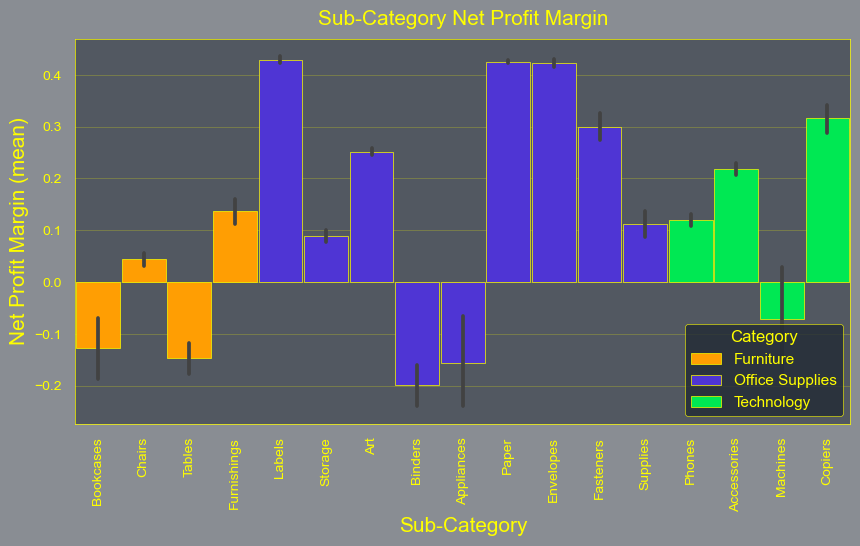

In [49]:
subcategories_plot(df, 'Net Profit Margin', "mean")

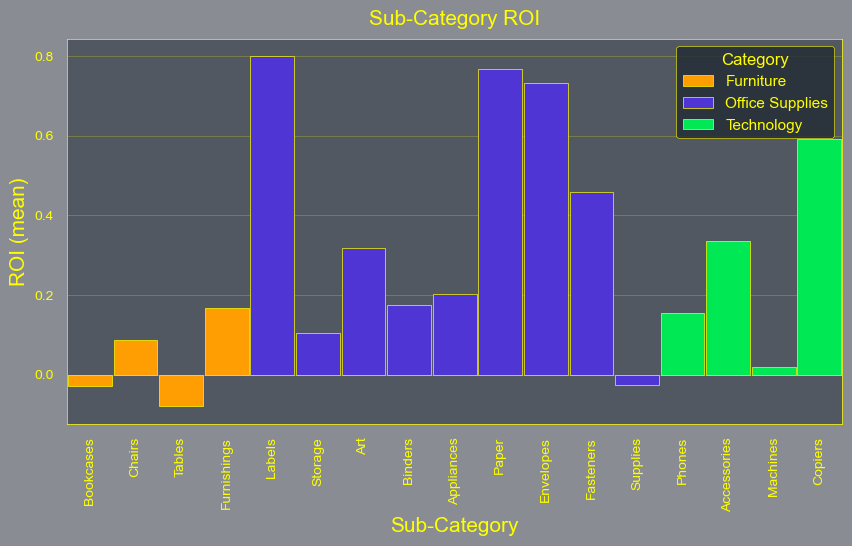

In [50]:
subcategories_plot(subcat_roi, 'ROI', 'mean', None)

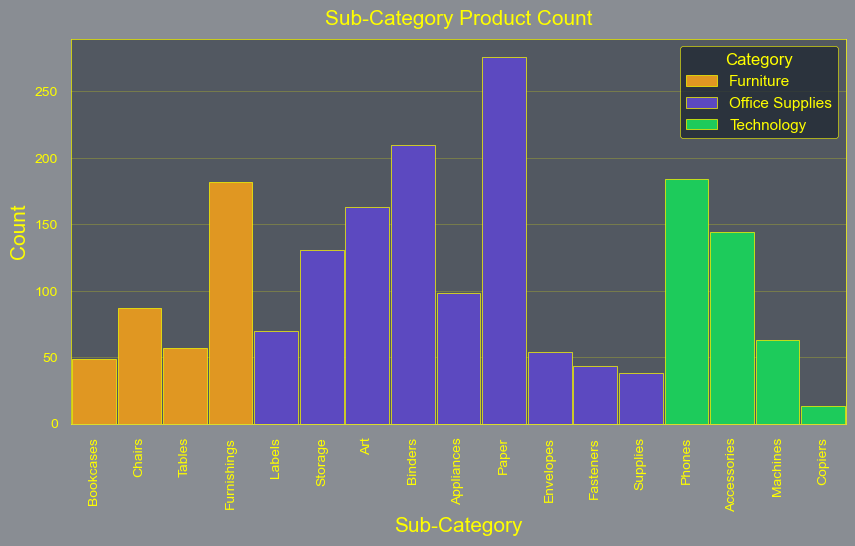

In [51]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.countplot(
    data=df.drop_duplicates(subset='Product ID'),
    x="Sub-Category",
    hue="Category",
    width=0.96,
    dodge=0,
    order=subcategories_order,
    palette=palette
)

ax.set_ylabel('Count')

plt.title('Sub-Category Product Count')
plt.xticks(rotation=90)
plt.show()

In [89]:
def convert_to_k(ax):
    '''Function for converting ylabels count from thousands to k'''
    ylabels = ["{:,.0f}".format(y) + "K" for y in ax.get_yticks() / 1000]
    ax.set_yticks(ax.get_yticks())
    ax.set_yticklabels(ylabels)

Text(0, 0.5, '')

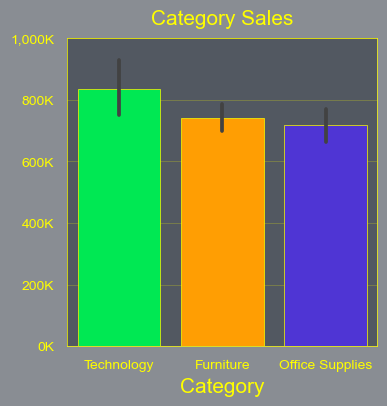

In [90]:
order = df.groupby("Category")["Sales"].sum().sort_values(ascending=False).index

fig, ax = plt.subplots(figsize=(4, 4))

sns.barplot(
    data=df,
    y="Sales",
    x="Category",
    estimator="sum",
    color=color[0],
    saturation=1,
    order=order,
    palette=[palette[2], palette[0], palette[1]],
    ax=ax,
)

convert_to_k(ax)
plt.title("Category Sales")
plt.ylabel("")

Text(0.5, 0, 'ROI mean')

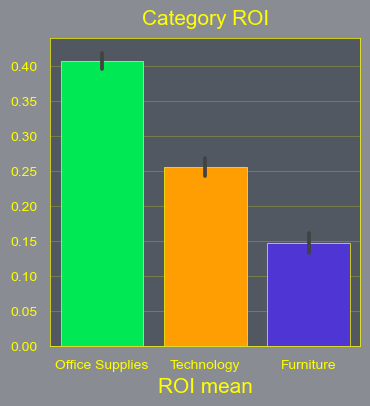

In [85]:
order = df.groupby("Category")["ROI"].mean().sort_values(ascending=False).index

fig, ax = plt.subplots(figsize=(4, 4))

sns.barplot(
    data=df,
    y="ROI",
    x="Category",
    estimator="mean",
    color=color[0],
    saturation=1,
    order=order,
    palette=[palette[2], palette[0], palette[1]],
    ax=ax,
)

plt.title("Category ROI")
plt.ylabel("")
plt.xlabel("ROI mean")

Text(0, 0.5, '')

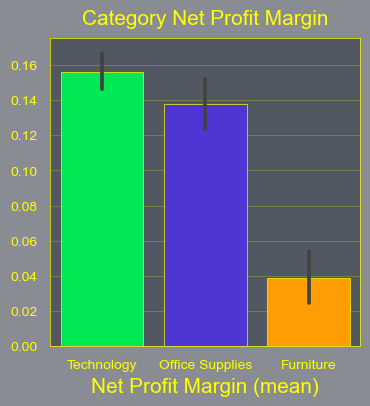

In [92]:
order = (
    df.groupby("Category")["Net Profit Margin"]
    .mean()
    .sort_values(ascending=False)
    .index
)

fig, ax = plt.subplots(figsize=(4, 4))

sns.barplot(
    data=df,
    y="Net Profit Margin",
    x="Category",
    estimator="mean",
    color=color[0],
    saturation=1,
    order=order,
    palette=[palette[2], palette[1], palette[0]],
    ax=ax,
)

plt.title("Category Net Profit Margin")
plt.xlabel("Net Profit Margin (mean)")
plt.ylabel("")

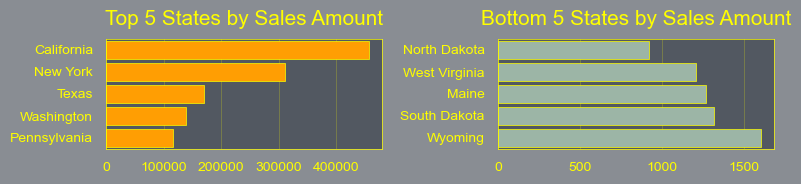

In [56]:
def top5_states(data, label, colors: tuple):
    fig, ax = plt.subplots(1, 2, figsize=(8, 2))
    sns.barplot(
        y=data.nlargest(5).index.tolist(),
        x=data.nlargest(5).values,
        color=colors[0],
        ax=ax[0],
        saturation=1,
    )
    sns.barplot(
        y=data.nsmallest(5).index.tolist(),
        x=data.nsmallest(5).values,
        color=colors[1],
        ax=ax[1],
        saturation=1,
    )

    ax[0].set_title(f"Top 5 States by {label}")
    ax[1].set_title(f"Bottom 5 States by {label}")
    plt.tight_layout()


top5_states(state_sales, "Sales Amount", (color[0], "#9cb5a6"))

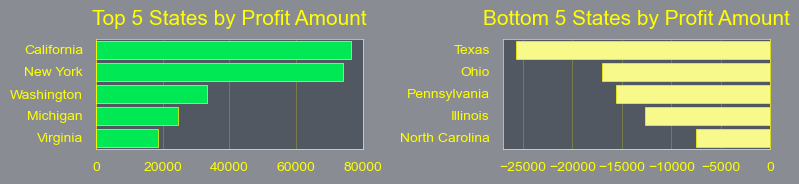

In [57]:
top5_states(state_profit, 'Profit Amount', (color[1], '#f7f98b'))

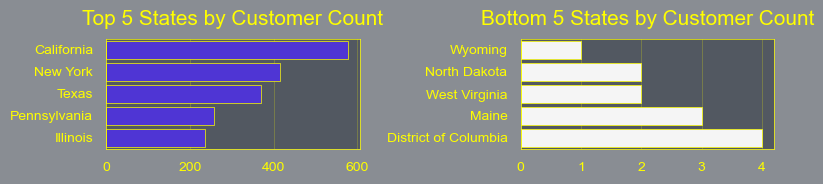

In [58]:
top5_states(state_customers, 'Customer Count', (color[2], '#f5f5f5'))

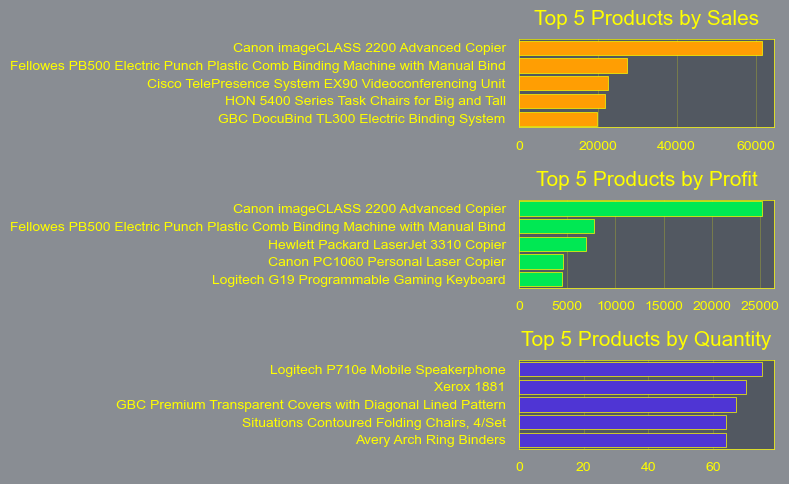

In [59]:
fig, ax = plt.subplots(3, 1, figsize=(8, 5))
sns.barplot(
    y=get_names(product_sales.nlargest(5).index, df),
    x=product_sales.nlargest(5).values,
    color=color[0],
    saturation=1,
    ax=ax[0],
)
sns.barplot(
    y=get_names(product_profit.nlargest(5).index, df),
    x=product_profit.nlargest(5).values,
    color=color[1],
    saturation=1,
    ax=ax[1],
)
sns.barplot(
    y=get_names(products_sold.nlargest(5).index, df),
    x=products_sold.nlargest(5).values,
    color=color[2],
    saturation=1,
    ax=ax[2],
)
ax[0].set_title("Top 5 Products by Sales")
ax[1].set_title("Top 5 Products by Profit")
ax[2].set_title("Top 5 Products by Quantity")
plt.tight_layout()

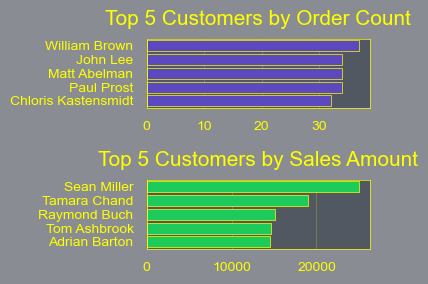

In [60]:
fig, ax = plt.subplots(2, 1, figsize=(4, 3))
sns.barplot(
    y=get_names(customer_orders.nlargest(5).index, df),
    x=customer_orders.nlargest(5).values,
    color=color[2],
    ax=ax[0],
)
sns.barplot(
    y=get_names(customer_sales.nlargest(5).index, df),
    x=customer_sales.nlargest(5).values,
    color=color[1],
    ax=ax[1],
)
ax[0].set_title("Top 5 Customers by Order Count")
ax[1].set_title("Top 5 Customers by Sales Amount")
plt.tight_layout()

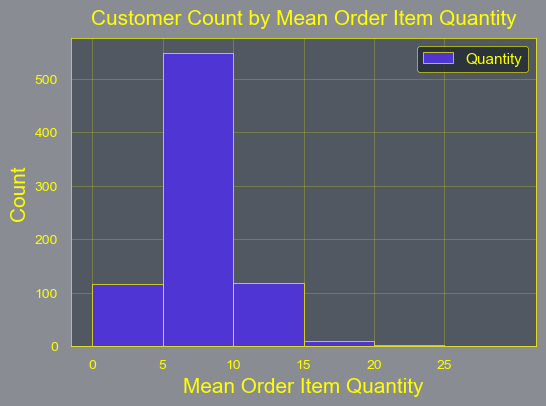

In [61]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.histplot(
    customer_order_quantity,
    bins=5,
    binwidth=5,
    binrange=(0, 30),
    alpha=1,
    palette=[color[2]],
)
ax.set_xticks(np.arange(0, 30, 5))
plt.title("Customer Count by Mean Order Item Quantity")
plt.xlabel("Mean Order Item Quantity")
plt.show()

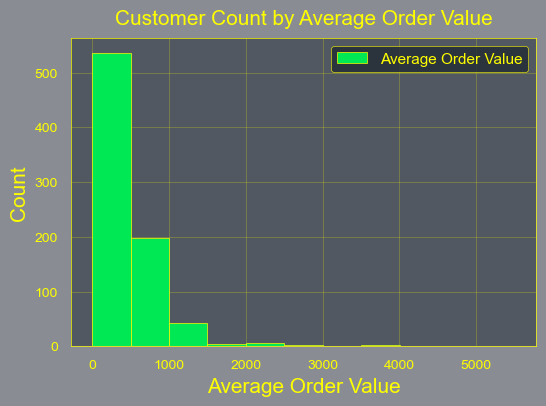

In [62]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.histplot(
    customer_avg_order, 
    binwidth=500, 
    alpha=1, 
    palette=[color[1]]
)

plt.title("Customer Count by Average Order Value")
plt.xlabel('Average Order Value')
plt.show()

In [93]:
df[df["State"].isin(state_profit.nsmallest(5).index)].groupby(
    ["State", "Sub-Category"], as_index=False
)["Sales"].sum().sort_values(by=["State", "Sales"], ascending=False).groupby(
    "State"
).head(3)

,State,Sub-Category,Sales
81,Texas,Phones,28589.568
69,Texas,Chairs,26572.448
83,Texas,Machines,19546.224
64,Pennsylvania,Phones,19702.404
52,Pennsylvania,Chairs,18724.174
67,Pennsylvania,Copiers,13079.868
47,Ohio,Phones,14634.948
35,Ohio,Chairs,10145.702
49,Ohio,Machines,8978.238
32,North Carolina,Machines,12620.655


In [65]:
df[df["State"].isin(state_profit.nsmallest(5).index)].groupby(
    ["State", "Sub-Category"], as_index=False
)["Discount"].mean().sort_values(by=["State", "Discount"], ascending=False).groupby(
    "State"
).head(1)

,State,Sub-Category,Discount
75,Texas,Binders,0.8
58,Pennsylvania,Binders,0.7
41,Ohio,Binders,0.7
24,North Carolina,Binders,0.7
7,Illinois,Binders,0.8


In [66]:
df[df["State"].isin(state_profit.nsmallest(5).index)].groupby(
    ["State", "Sub-Category"], as_index=False
)["Quantity"].sum().sort_values(by=["State", "Quantity"], ascending=False).groupby(
    "State"
).head(1)

,State,Sub-Category,Quantity
75,Texas,Binders,626
58,Pennsylvania,Binders,331
41,Ohio,Binders,292
24,North Carolina,Binders,185
7,Illinois,Binders,327


In [67]:
df[df["State"].isin(state_profit.nlargest(5).index)].groupby(
    ["State", "Category"], as_index=False
)["Quantity"].sum().sort_values(by=["State", "Quantity"], ascending=False)

,State,Category,Quantity
13,Washington,Office Supplies,1102
12,Washington,Furniture,429
14,Washington,Technology,352
10,Virginia,Office Supplies,516
9,Virginia,Furniture,233
11,Virginia,Technology,144
7,New York,Office Supplies,2585
6,New York,Furniture,877
8,New York,Technology,762
4,Michigan,Office Supplies,612


Text(-39.25, 0.5, '')

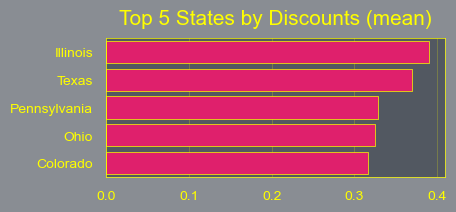

In [68]:
fig, ax = plt.subplots(1, figsize=(5, 2))

sns.barplot(
    y=state_discount.nlargest(5).index,
    x=state_discount.nlargest(5).values,
    color=color[3],
)
plt.tight_layout()
ax.set_title("Top 5 States by Discounts (mean)")
ax.set_ylabel("")

Text(-25.75, 0.5, '')

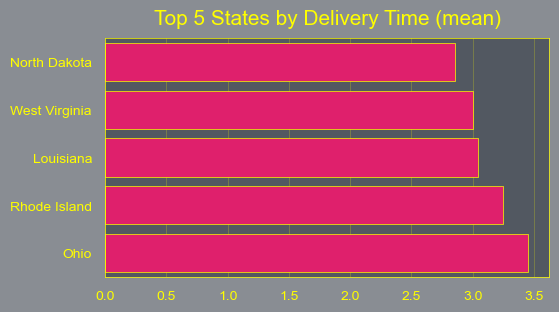

In [69]:
state_del_time = (
    df.groupby("State")["Delivery Time"].mean().sort_values(ascending=False)
)

fig, ax = plt.subplots(1, figsize=(6, 3))
sns.barplot(
    y=state_del_time.nsmallest(5).index,
    x=state_del_time.nsmallest(5).values,
    color=color[3],
)
plt.tight_layout()
ax.set_title("Top 5 States by Delivery Time (mean)")
ax.set_ylabel("")

In [71]:
# Number of Customers with Single Purchase

start = df["Order Date"].min()
months = df.groupby(pd.Grouper(key="Order Date", freq="M"))
n_list = []
for month, data in months:
    c_orders = (
        df[(df["Order Date"] >= start) & (df["Order Date"] <= month)]
        .groupby("Customer ID")["Order ID"]
        .nunique()
        .reset_index()
    )
    unique_order = c_orders[c_orders["Order ID"] == 1].count()[0]
    n_list.append((month, unique_order))
n_lone_customers = pd.DataFrame(
    n_list, columns=["Month", "Number of One-Time Customers"]
)

In [72]:
# Names of Customers with single purchase

get_names(customer_orders[customer_orders == 1].index, df)

["Anthony O'Donnell",
 'Carl Jackson',
 'Jocasta Rupert',
 'Lela Donovan',
 'Ricardo Emerson']

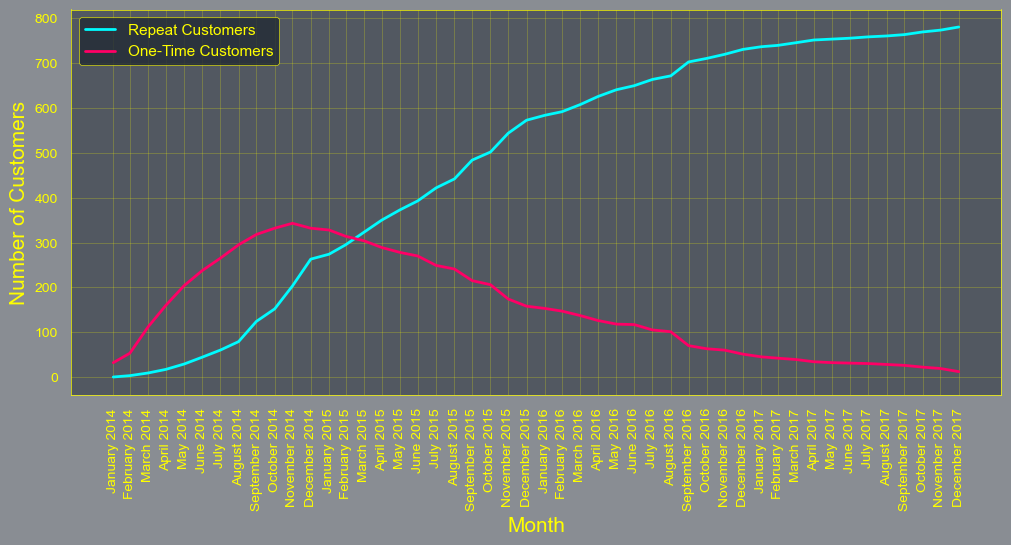

In [73]:
# Number of Repeat Customers

start = df["Order Date"].min()
months = df.groupby(pd.Grouper(key="Order Date", freq="M"))

n_list = []

for month, data in months:
    c_orders = (
        df[(df["Order Date"] >= start) & (df["Order Date"] <= month)]
        .groupby("Customer ID")["Order ID"]
        .nunique()
        .reset_index()
    )
    unique_order = c_orders[c_orders["Order ID"] > 1].count()[0]
    n_list.append((month, unique_order))
    
repeat_customers = pd.DataFrame(n_list, columns=["Month", "Number of Repeat Customers"])

fig, ax = plt.subplots(figsize=(12, 5))
months = list(months.groups.keys())
sns.lineplot(
    data=repeat_customers,
    x="Month",
    y="Number of Repeat Customers",
    label="Repeat Customers",
    color="#00fbff",
    linewidth=2,
)
sns.lineplot(
    data=n_lone_customers,
    x="Month",
    y="Number of One-Time Customers",
    label="One-Time Customers",
    color=color[3],
    linewidth=2,
)
xlabels = [m.strftime("%B %Y") for m in months]
plt.xticks(pd.date_range(min(months), max(months), freq="M"), xlabels, rotation=90)
plt.ylabel("Number of Customers")
plt.show()

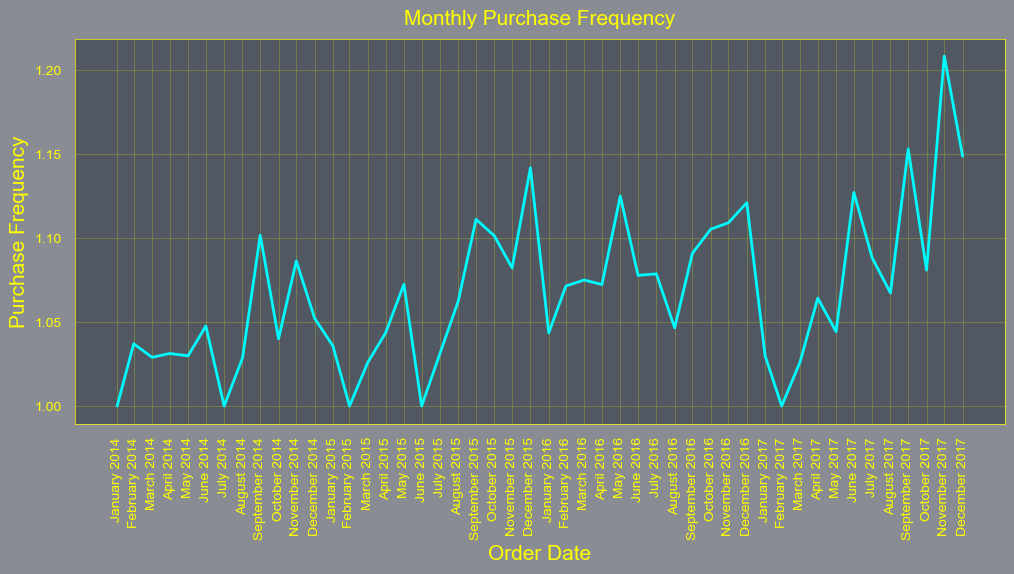

In [74]:
# Purchase Frequency per month Plot

fig, ax = plt.subplots(figsize=(12, 5))

months = (
    df.groupby(pd.Grouper(key="Order Date", freq="M"))
    .agg({"Order ID": "nunique", "Customer ID": "nunique"})
    .reset_index()
)
months["Ratio"] = months["Order ID"] / months["Customer ID"]
sns.lineplot(data=months, x="Order Date", y="Ratio", color="#00fbff", linewidth=2)
xlabels = [m.strftime("%B %Y") for m in months["Order Date"]]
plt.xticks(
    pd.date_range(months["Order Date"].min(), months["Order Date"].max(), freq="M"),
    xlabels,
    rotation=90,
)
ax.set_ylabel("Purchase Frequency")
ax.set_title("Monthly Purchase Frequency")
plt.show()

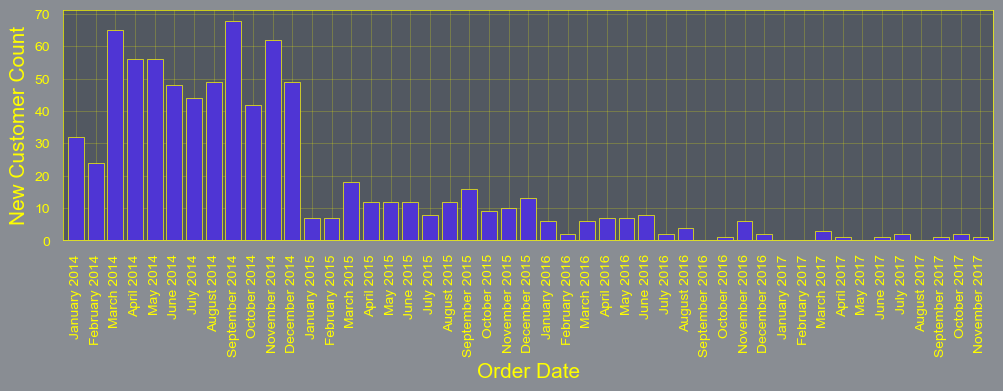

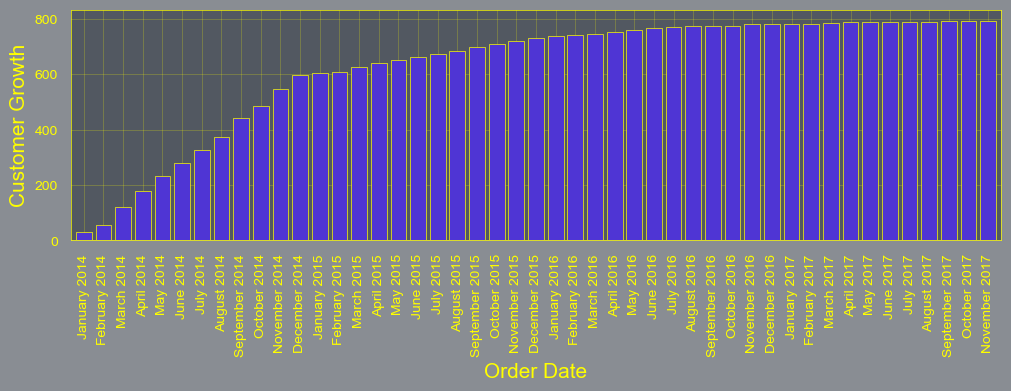

In [75]:
def customer_growth_plot(type, dates):
    
    fig, ax = plt.subplots(figsize=(12, 3))

    months = dates.groupby(pd.Grouper(key="Order Date", freq='M'))
    monthly_customer_count = months['Customer ID'].count()
    if type == "new":
         count = monthly_customer_count
         ax.set_ylabel("New Customer Count")
    else: 
        count = monthly_customer_count.cumsum()
        ax.set_ylabel("Customer Growth")
    count.plot(
        kind='bar',
        width=0.8, 
        color=color[2]
    )
    xlabels = [m.strftime('%B %Y') for m, g in months]
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(xlabels)
    plt.show()

customer_growth_plot("new", customer_first_order)
customer_growth_plot("total", customer_first_order)

<Axes: >

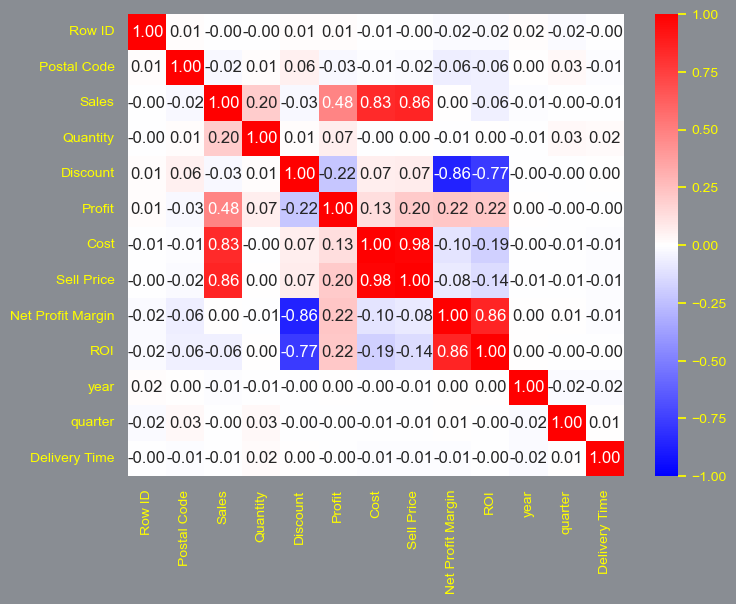

In [76]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(
        df.corr(numeric_only=True),
        annot=True,
        fmt=".2f",
        cmap="bwr",
        vmin=-1,
        vmax=1,
)

KPIs

In [77]:
# Customer lifetime value (CLV)

clv = (
    df.groupby(["Customer ID", "year"], as_index=False)["Sales"]
    .sum()
    .groupby("year", as_index=False)["Sales"]
    .mean()
)
clv.rename(columns={"Sales": "CLV"}, inplace=True)
clv

,year,CLV
0,2014,813.861341
1,2015,821.173663
2,2016,954.867708
3,2017,1058.030671


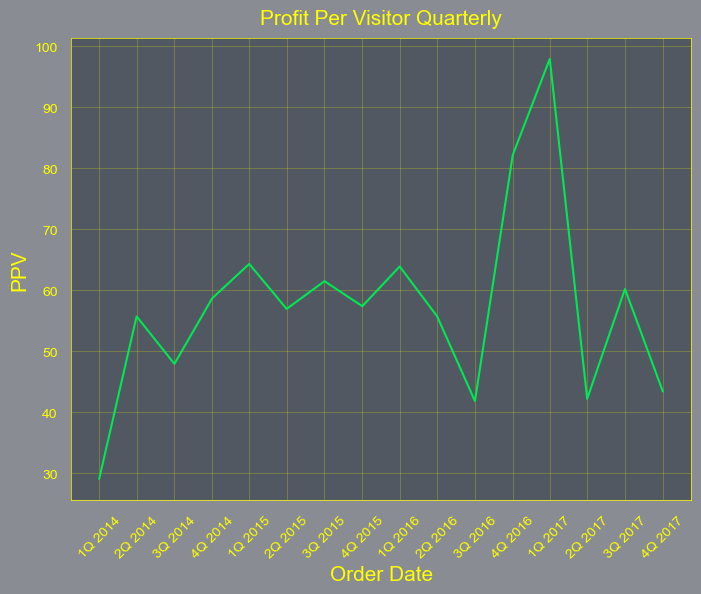

In [78]:
# Revenue per visitor (RPV)

ppv = (
    df.groupby(["Order ID", pd.Grouper(key="Order Date", freq="Q")], as_index=False)[
        "Profit"
    ]
    .sum()
    .groupby("Order Date", as_index=False)["Profit"]
    .mean()
)
ppv["year"] = ppv["Order Date"].dt.year
ppv["quarter"] = ppv["Order Date"].dt.quarter
ppv.rename(columns={"Profit": "PPV"}, inplace=True)

fig, ax = plt.subplots(figsize=(8, 6))

sns.lineplot(data=ppv, x="Order Date", y="PPV", color=color[1])
xlabels = [(str(q.quarter) + "Q " + str(q.year)) for q in ppv["Order Date"]]
plt.xticks(
    pd.date_range(ppv["Order Date"].min(), ppv["Order Date"].max(), freq="Q"),
    xlabels,
    rotation=45,
)
plt.title("Profit Per Visitor Quarterly")
plt.show()

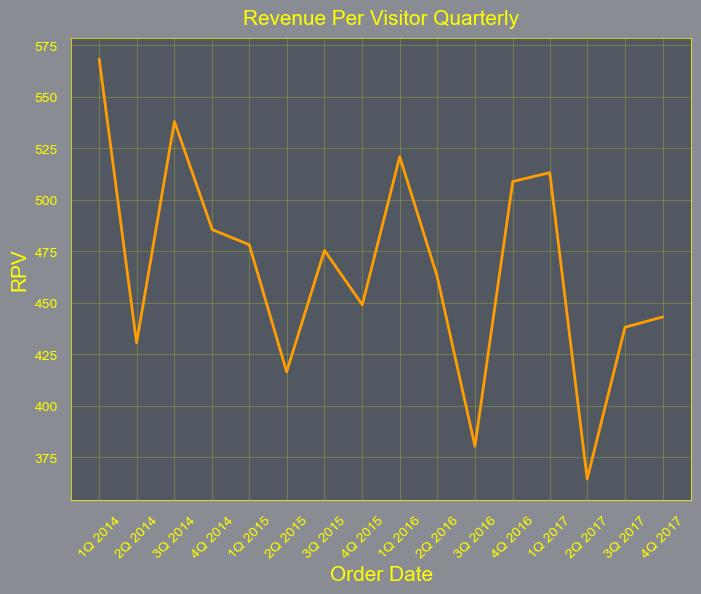

In [79]:
# Revenue per visitor (RPV)

rpv = (
    df.groupby(["Order ID", pd.Grouper(key="Order Date", freq="Q")], as_index=False)[
        "Sales"
    ]
    .sum()
    .groupby("Order Date", as_index=False)["Sales"]
    .mean()
)
rpv["year"] = rpv["Order Date"].dt.year
rpv["quarter"] = rpv["Order Date"].dt.quarter
rpv.rename(columns={"Sales": "RPV"}, inplace=True)

fig, ax = plt.subplots(figsize=(8, 6))

sns.lineplot(data=rpv, x="Order Date", y="RPV", color=color[0], linewidth=2)
xlabels = [(str(q.quarter) + "Q " + str(q.year)) for q in rpv["Order Date"]]
plt.xticks(
    pd.date_range(rpv["Order Date"].min(), rpv["Order Date"].max(), freq="Q"),
    xlabels,
    rotation=45,
)
plt.title("Revenue Per Visitor Quarterly")
plt.show()

In [80]:
df.groupby("Region", as_index=False).agg(
    {"Profit": "sum", "Sales": "sum", "State": "nunique"}
).sort_values("Sales", ascending=False)

,Region,Profit,Sales,State
3,West,108418.4489,725457.8245,11
1,East,91522.7800,678781.2400,14
0,Central,39706.3625,501239.8908,13
2,South,46749.4303,391721.9050,11


In [81]:
with open("us-states.json", "r") as json_file:
    us_states = json.load(json_file)

with open("us-states-coordinates.json", "r") as json_file:
    us_state_coordinates = json.load(json_file)


def get_state_coordinates(state, coordinates_json):
    # Default to [0, 0] if no coordinates found
    return coordinates_json.get(state, [0, 0])


def name_marker(data, map, html, color):
    txt_color = f"color: {color};"
    for name in data.index:
        coordinates = get_state_coordinates(name, us_state_coordinates)
        label = folium.Marker(
            location=coordinates,  # Use the coordinates from the GeoJSON
            icon=folium.DivIcon(html=html[0] + txt_color + html[1] + name + html[2]),
        )
        label.add_to(map)


# Top 5, Bottom 5 Map

def top5_map(state_data):
    fig = Figure(width=800, height=600)

    state_values = state_data
    top5 = state_values.nlargest(5)
    bottom5 = state_values.nsmallest(5)
    max_value = top5.max()
    min_value = bottom5.min()
    my_colormap = LinearColormap(
        colors=["#262626", "#00e853"], index=[0, 100], vmin=0, vmax=100
    )
    colormap = my_colormap.scale(min_value, max_value)
    color_dict = {key: colormap(state_values[key]) for key in state_values.keys()}

    m = folium.Map([40, -100], tiles="cartodbdark_matter", zoom_start=4)

    colormap.caption = "Sales Sum"
    colormap.add_to(m)

    for feature in us_states["features"]:
        state = feature["properties"]["name"]
        geojson_state = folium.GeoJson(
            feature,
            style_function=lambda feature: {
                "fillColor": color_dict.get(feature["properties"]["name"], "grey"),
                "color": "#666666",
                "weight": 1,
                "fillOpacity": 1,
            },
            tooltip=state,
        ).add_to(m)

    html = [
        '<div style="font-size: 20px; font-weight: bold;',
        'width:200px; text-decoration: initial; text-shadow: -1px -1px 0 #000, \
        1px -1px 0 #000, -1px 1px 0 #000, 1px 1px 0 #000; ">',
        "</div>",
    ]

    name_marker(top5, m, html, "#78ffac")
    name_marker(bottom5, m, html, "#f7ff96")

    m.save("map.html")
    fig.add_child(m)

    return fig


top5_map(state_sales)

In [82]:
top5_map(state_profit)

In [83]:
top5_map(state_customers)